In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
from subprocess import Popen, PIPE, DEVNULL

In [2]:
categories = [
    "extend",
    "merge",
    "subtract",
    "intersect",
    "sample",
    "random",
    "sort",
    "closest",
    "complement",
    "getfasta",
]

def classify(x):
    if "gia" in x.command:
        return "gia"
    elif "bedops" in x.command or "sort-bed" in x.command or "closest-features" in x.command:
        return "bedops"
    else:
        return "bedtools"

frame = []
for c in categories:
    cat_frame = pd.read_csv(f"results/{c}.csv")
    cat_frame["category"] = c
    cat_frame["tool"] = cat_frame.apply(lambda x: classify(x), axis=1)
    cat_frame["named"] = cat_frame.apply(lambda x: "numeric" if "gia" in x.command and "-N" not in x.command else "named", axis=1)
    cat_frame["handle"] = cat_frame.apply(lambda x: x.tool + "_" + x.named if x.tool == "gia" else x.tool, axis=1)

    frame.append(cat_frame)
frame = pd.concat(frame)
frame

,command,mean,stddev,median,user,system,min,max,category,tool,named,handle
0,gia extend -i data/large.bed -b 1000 -o /dev/null,0.045816,0.000622,0.045797,0.040575,0.004749,0.044317,0.047928,extend,gia,numeric,gia_numeric
1,gia extend -N -i data/large.bed -b 1000 -o /de...,0.055234,0.000659,0.055264,0.049634,0.005081,0.054175,0.058945,extend,gia,named,gia_named
2,bedtools slop -i data/large.bed -g data/genome...,0.224828,0.001337,0.224711,0.215948,0.008151,0.222335,0.226656,extend,bedtools,named,bedtools
3,bedops --range 1000 -u data/large.bed > /dev/null,0.151484,0.000838,0.151413,0.144561,0.006253,0.149738,0.152992,extend,bedops,named,bedops
0,gia merge -i data/large.bed -o /dev/null,0.033323,0.000604,0.033321,0.029455,0.003335,0.032304,0.034548,merge,gia,numeric,gia_numeric
1,gia merge -N -i data/large.bed -o /dev/null,0.042663,0.000430,0.042687,0.038123,0.003991,0.041676,0.043632,merge,gia,named,gia_named
2,bedtools merge -i data/large.bed > /dev/null,0.098699,0.000645,0.098731,0.093633,0.004622,0.097236,0.099642,merge,bedtools,named,bedtools
3,bedops -m data/large.bed > /dev/null,0.104848,0.000576,0.104892,0.099202,0.005152,0.103939,0.106874,merge,bedops,named,bedops
0,gia subtract -a data/a.sorted.bed -b data/b.so...,0.040091,0.000616,0.039962,0.036053,0.003549,0.039291,0.043187,subtract,gia,numeric,gia_numeric
1,gia subtract -N -a data/a.sorted.bed -b data/b...,0.047811,0.000457,0.047793,0.043446,0.003860,0.046818,0.049117,subtract,gia,named,gia_named


In [3]:
granges = pd.read_csv("results/granges.csv")
frame = pd.concat([frame, granges])

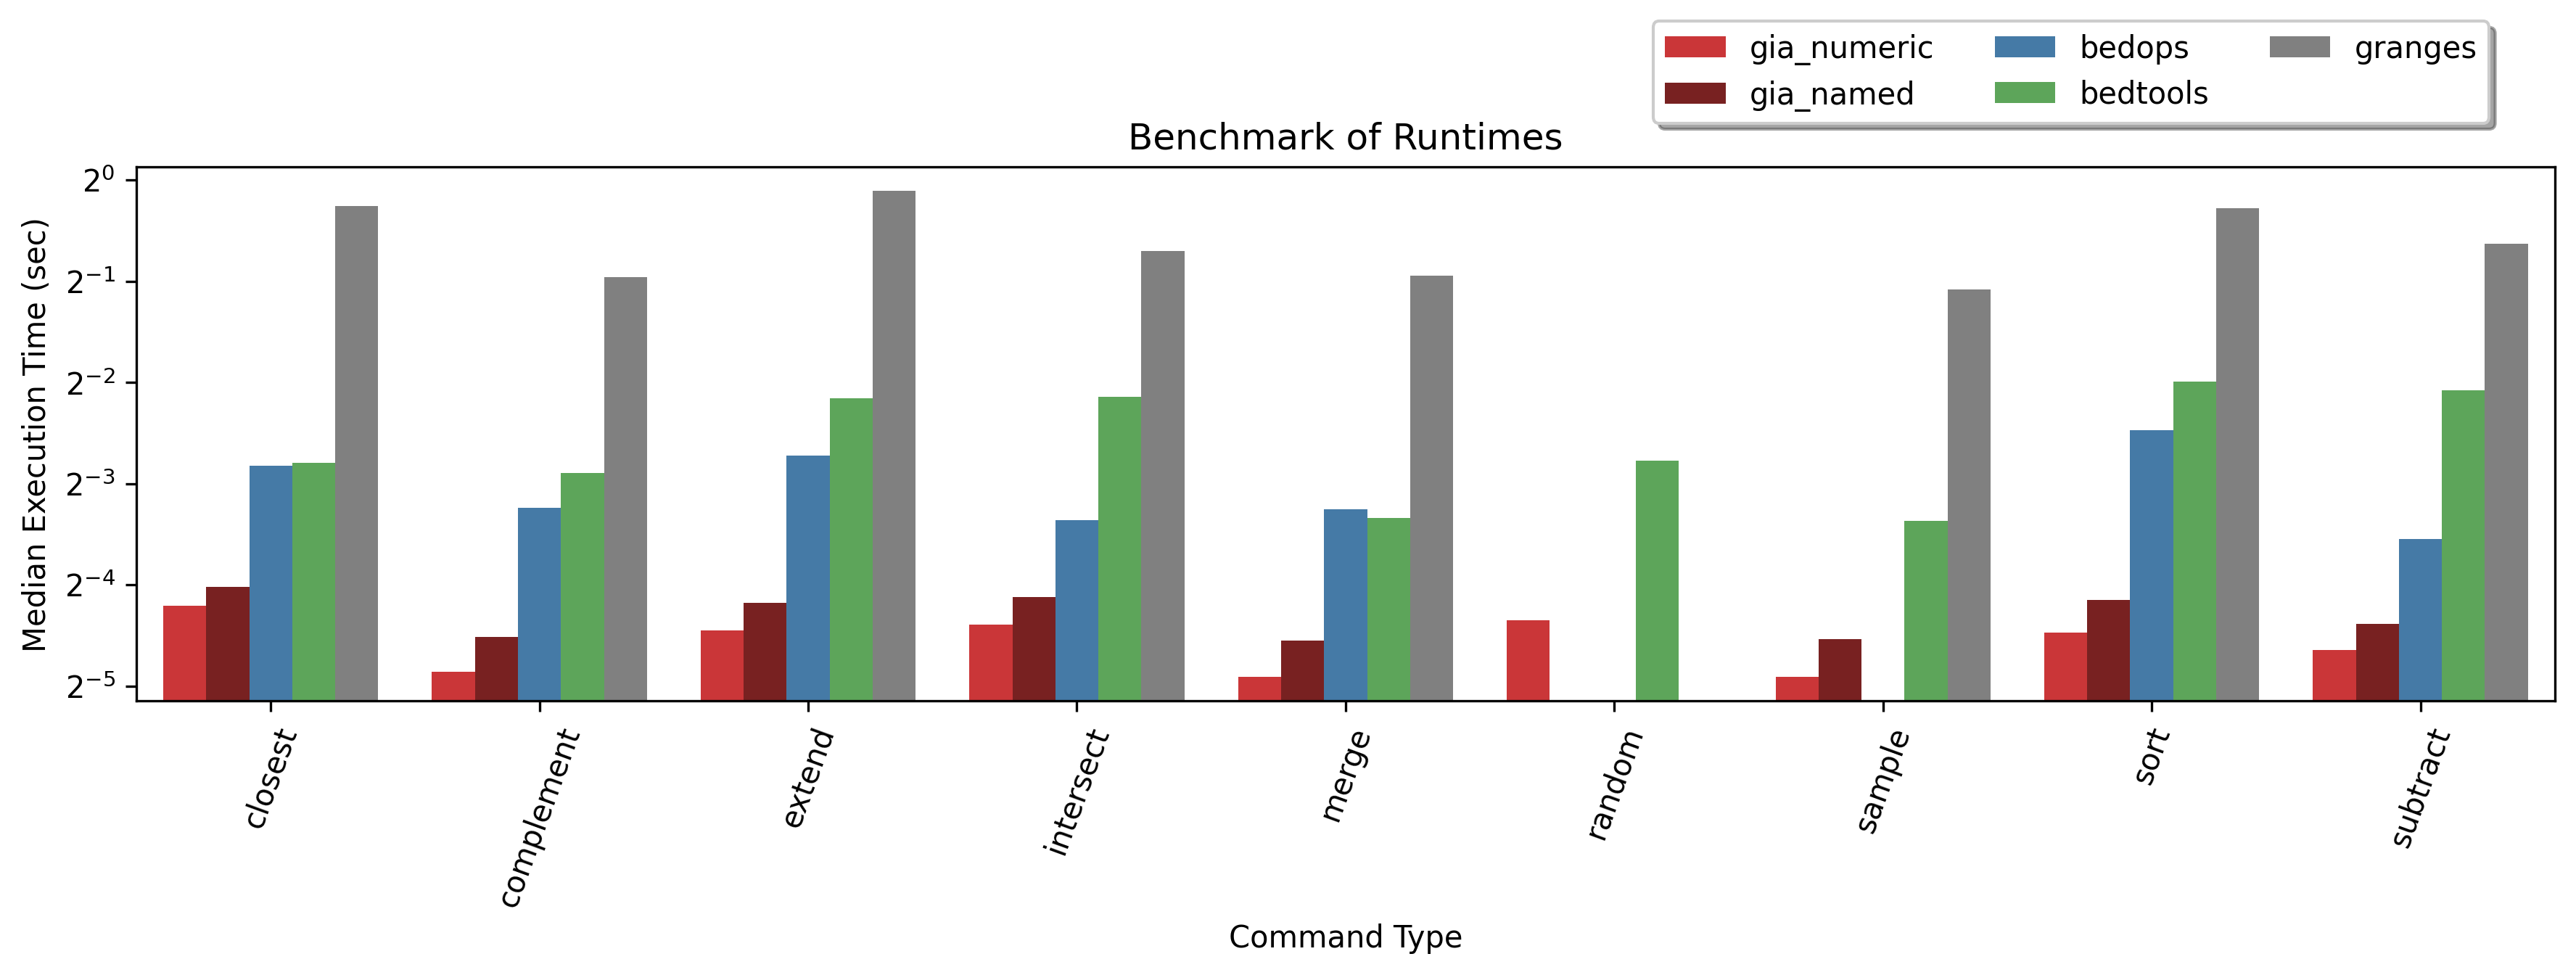

In [4]:
plot_frame = frame[frame.category != "getfasta"].sort_values("category")
plt.figure(figsize=(12, 5), dpi=300)
sns.barplot(
    plot_frame,
    x="category",
    y="median", 
    hue="handle",
    hue_order = ["gia_numeric", "gia_named", "bedops", "bedtools", "granges"],
    palette={
        "gia_numeric":  "#e31d20",
        "gia_named":  "#871212",
        "bedops": "#357cb6",
        "bedtools": "#51b14e",
        "granges": "grey",
    },
)
plt.title("Benchmark of Runtimes")
plt.ylabel("Median Execution Time (sec)")
plt.xlabel("Command Type")
plt.legend(loc="upper right")
plt.xticks(rotation=70)
# plt.legend(loc="upper left")
plt.yscale("log", base=2)
plt.legend(loc='upper center', bbox_to_anchor=(0.8, 1.3),
          ncol=3, fancybox=True, shadow=True)
plt.tight_layout()
plt.savefig("figures/runtimes_general.svg")
plt.savefig("figures/runtimes_general.png")
plt.show()

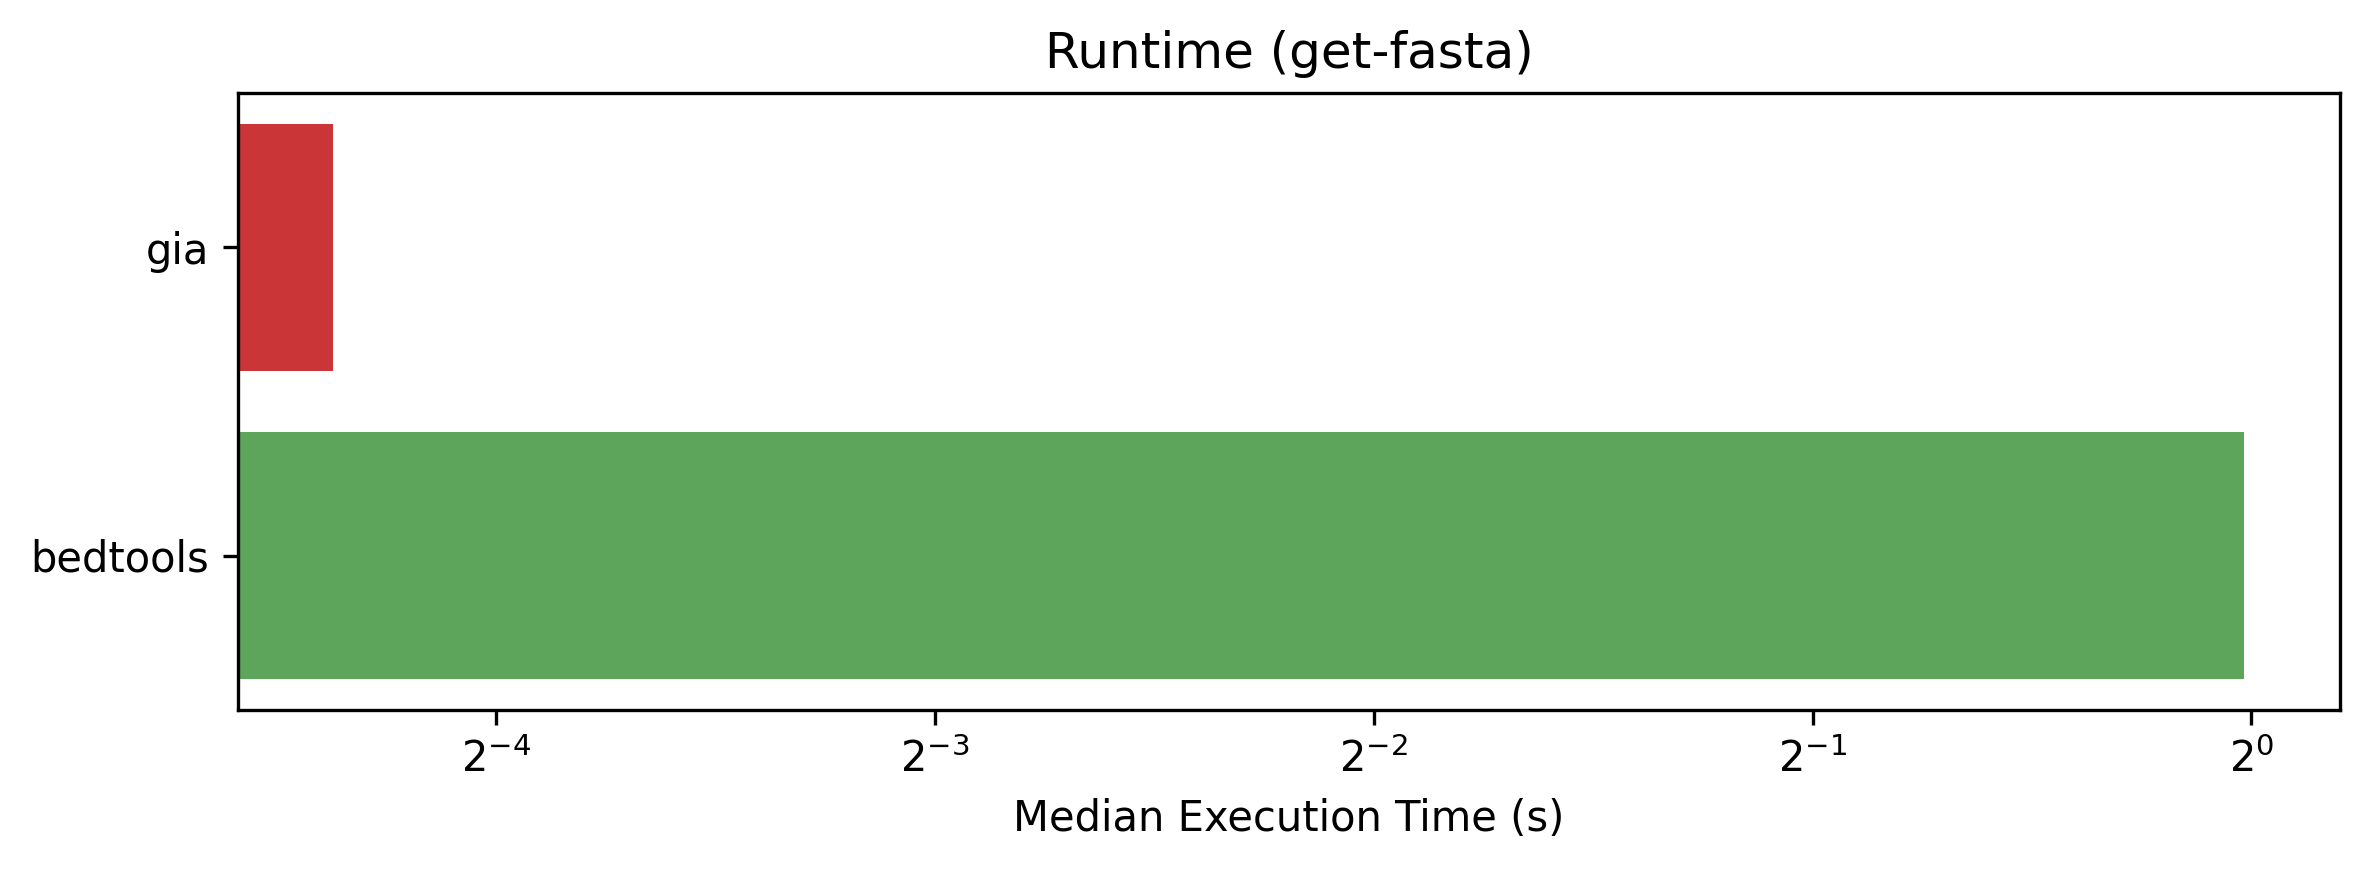

In [5]:
palette={
    "gia":  "#e31d20",
    "bedtools": "#51b14e",
}
getfasta_frame = frame[frame.category == "getfasta"].sort_values("category")
fig, axs = plt.subplots(1, 1, figsize=(8, 3), dpi=300)
sns.barplot(
    getfasta_frame,
    y="tool",
    x="median", 
    hue="tool",
    dodge=False,
    hue_order = ["gia", "bedtools"],
    palette=palette,
    orient="horizontal",
    ax=axs,
)
axs.set_title("Runtime (get-fasta)")
axs.set_xlabel("Median Execution Time (s)")

axs.set_ylabel("")
axs.get_legend().remove()
axs.set_xscale("log")
plt.xscale("log", base=2)
plt.tight_layout()
plt.savefig("figures/runtimes_getfasta.svg")
plt.savefig("figures/runtimes_getfasta.png")
plt.show()

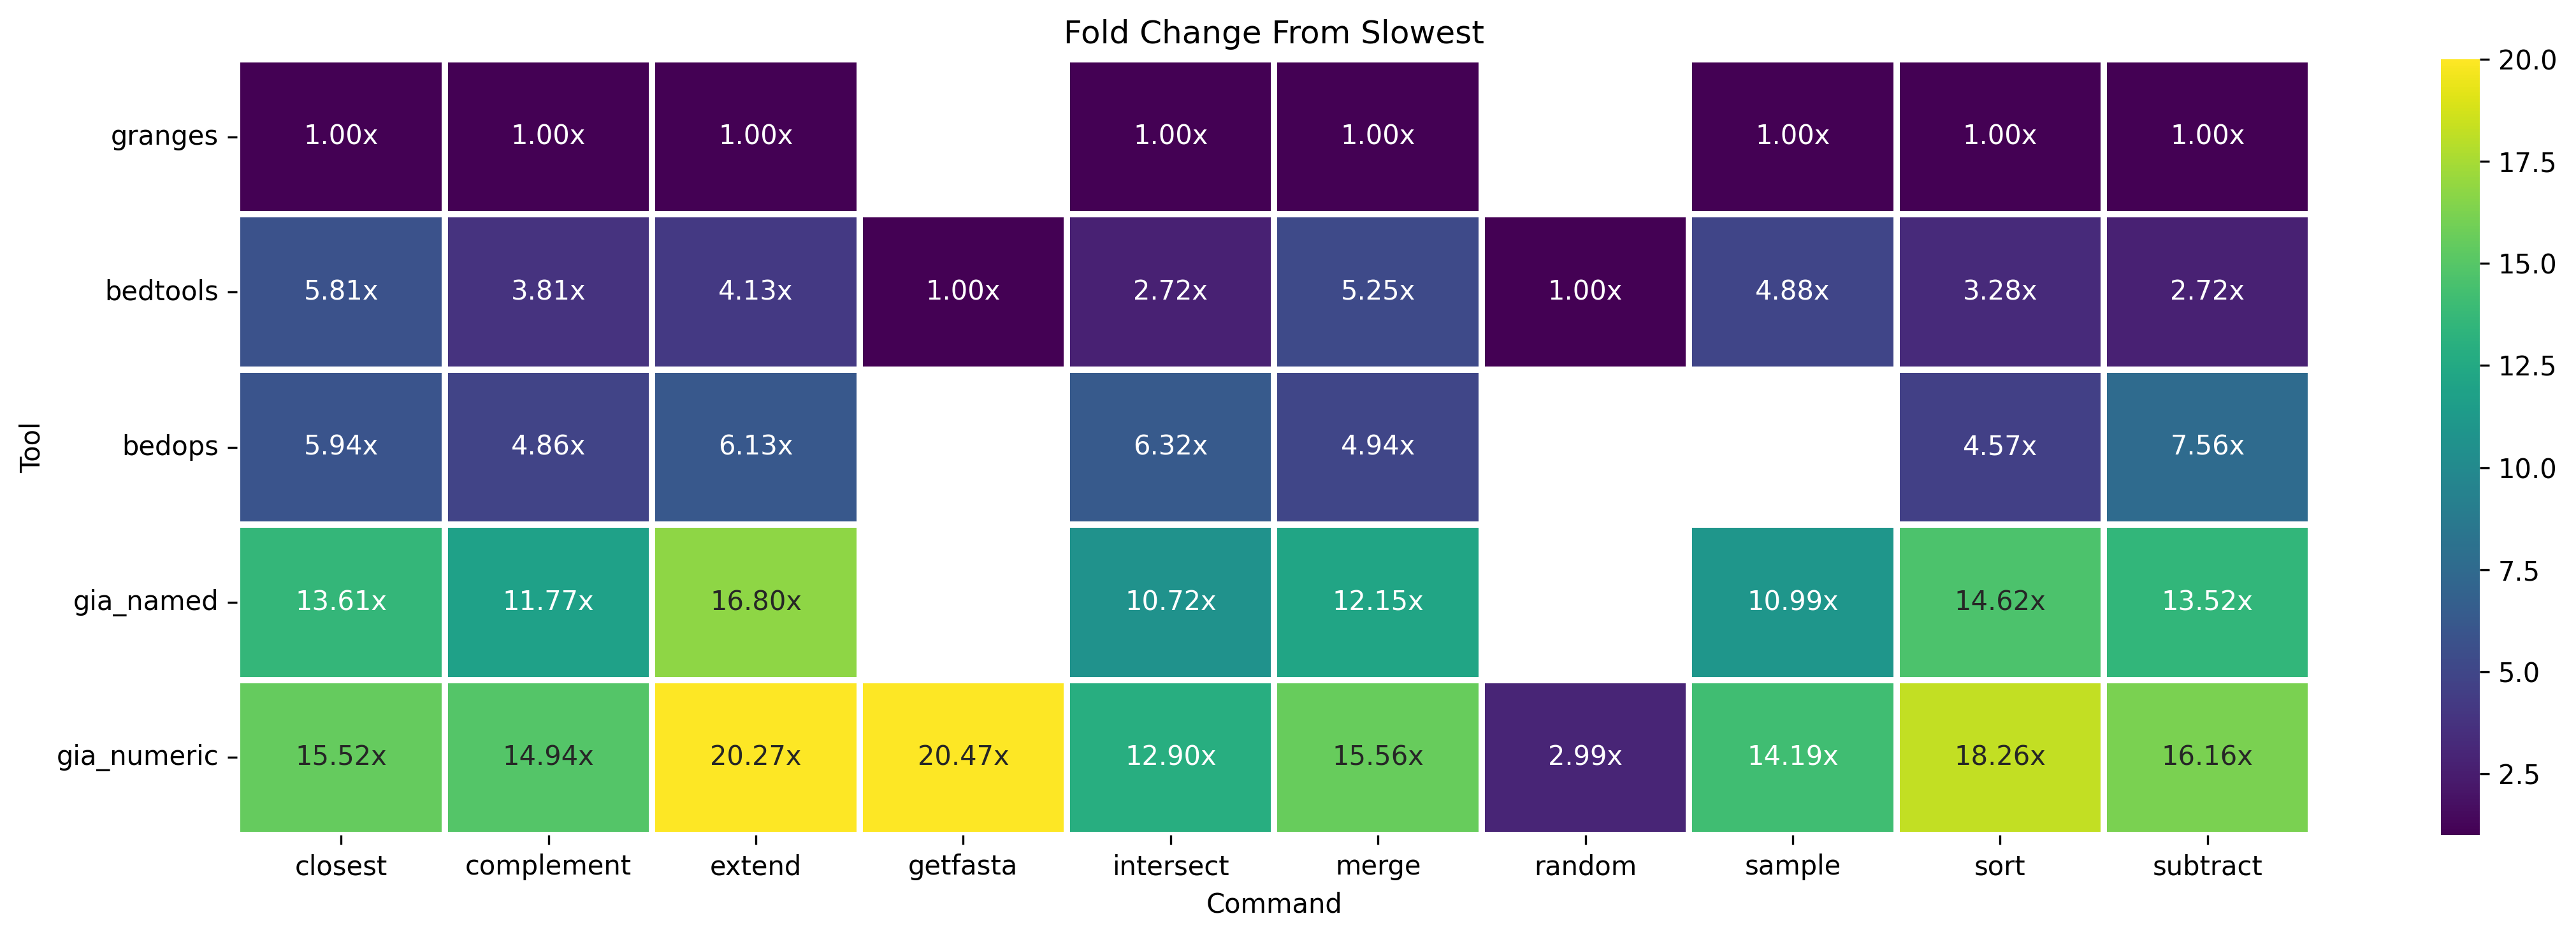

In [6]:
plt.figure(figsize=(15, 5), dpi=300)

matrix = frame.pivot_table(index="handle", columns="category", values="median")
maximums = matrix.max(axis=0).values
fold_change = maximums / matrix
fold_change = fold_change.loc[[
    "granges",
    "bedtools",
    "bedops",
    "gia_named",
    "gia_numeric"
]]

h = sns.heatmap(fold_change, annot=True, cmap="viridis", linewidths=2, fmt=".2f", vmax=20)
for t in h.texts:
    t.set_text(t.get_text() + "x")
plt.xlabel("Command")
plt.ylabel("Tool")
plt.title("Fold Change From Slowest")
plt.tight_layout()
plt.savefig("figures/heatmap_fold_change.svg")
plt.savefig("figures/heatmap_fold_change.png")
plt.show()